In [35]:
import pandas as pd
import numpy as np

raw_df = pd.read_csv("survey_results_public.csv")
schema_raw = pd.read_csv("survey_results_schema.csv")

In [36]:
schema_raw = pd.DataFrame(schema_raw)
schema_raw.columns
schema_raw.set_index("qname",inplace=True)
schema_raw = schema_raw.iloc[5:,1]
schema_raw

qname
MainBranch          Which of the following options best describes ...
Age                                               What is your age? *
Employment          Which of the following best describes your cur...
RemoteWork          Which best describes your current work situation?
CodingActivities    Which of the following best describes the code...
                                          ...                        
Knowledge_7         Waiting on answers to questions often causes i...
Knowledge_8         I feel like I have the tools and/or resources ...
Frequency_1         Needing help from people outside of your immed...
Frequency_2         Interacting with people outside of your immedi...
Frequency_3         Encountering knowledge silos (where one indivi...
Name: question, Length: 73, dtype: object

In [37]:
Selected_Columns_For_Survey = [
    #Demographics
    'Age',
    'Country',
    'EdLevel',
    'LearnCode',
    #Artificial Intelligence
    'AISearchHaveWorkedWith',
    'AIDevHaveWorkedWith',
    'SOAI',
    'AISelect',
    'AISent',
    'AIToolInterested in Using',
    #Programming
    'LearnCode',
    'LearnCodeOnline',
    'LearnCodeCoursesCert',
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    ]


In [38]:
Survey_df = raw_df[Selected_Columns_For_Survey].copy()

In [39]:
Selected_Columns_For_Schema = [
    'Age',
    'Country',
    'EdLevel',
    'LearnCode',
    'AISearch',
    'AIDev',
    'SOAI',
    'AISelect',
    'AISent',
    'AITool',
    'LearnCode',
    'LearnCodeOnline',
    'LearnCodeCoursesCert',
    'YearsCode',
    'YearsCodePro',
    'Language'
    ]

In [40]:
schema = schema_raw[Selected_Columns_For_Schema]


In [41]:
age_mapping = {
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Under 18 years old': 10,  # Example mean value for 'Under 18 years old'
    'Prefer not to say': None  # Or some other placeholder value
}
Survey_df['Age'] = Survey_df['Age'].map(age_mapping)
Survey_df.head()


,Age,Country,EdLevel,LearnCode,AISearchHaveWorkedWith,AIDevHaveWorkedWith,SOAI,AISelect,AISent,AIToolInterested in Using,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,LanguageHaveWorkedWith
0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30.0,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,ChatGPT,GitHub Copilot,"I don't think it's super necessary, but I thin...",Yes,Indifferent,Learning about a codebase;Writing code;Debuggi...,Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,HTML/CSS;JavaScript;Python
2,49.0,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,NaN,NaN,NaN,"No, and I don't plan to",NaN,NaN,Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,Bash/Shell (all shells);Go
3,30.0,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,NaN,NaN,I'm wearing of Stack Overflow using AI.,"No, and I don't plan to",NaN,NaN,Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,NaN,12,7,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...
4,30.0,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,ChatGPT,NaN,Using AI to suggest better answer to my questi...,Yes,Very favorable,Project planning;Testing code;Committing and r...,Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other;Codecademy;edX,6,4,HTML/CSS;JavaScript;TypeScript


In [42]:
Survey_df["YearsCode"] = pd.to_numeric(Survey_df.YearsCode,errors="coerce")
Survey_df["YearsCodePro"] = pd.to_numeric(Survey_df.YearsCodePro,errors="coerce")

In [43]:
Survey_df.describe()

,Age,YearsCode,YearsCodePro
count,88735.000000,86114.000000,64217.000000
mean,32.754302,13.972049,11.508354
std,11.545634,10.259548,9.070346
min,10.000000,1.000000,1.000000
25%,30.000000,6.000000,5.000000
50%,30.000000,11.000000,9.000000
75%,39.000000,20.000000,16.000000
max,70.000000,50.000000,50.000000


In [44]:
Survey_df.sample(5)

,Age,Country,EdLevel,LearnCode,AISearchHaveWorkedWith,AIDevHaveWorkedWith,SOAI,AISelect,AISent,AIToolInterested in Using,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,LanguageHaveWorkedWith
14790,30.0,Poland,"Associate degree (A.A., A.S., etc.)",Books / Physical media;Online Courses or Certi...,ChatGPT,GitHub Copilot,NaN,Yes,Indifferent,Debugging and getting help,Books / Physical media;Online Courses or Certi...,NaN,Udemy,10.0,6.0,JavaScript;TypeScript
64056,30.0,Slovenia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Hackathons (...,NaN,GitHub Copilot,It's just another statistical model which can ...,Yes,Favorable,Documenting code;Testing code,Colleague;Friend or family member;Hackathons (...,Formal documentation provided by the owner of ...,NaN,13.0,5.0,Bash/Shell (all shells);C;C#;C++;Dart;Go;HTML/...
28539,39.0,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Oth...,NaN,NaN,"I think you will do so to stay relevant, but p...","No, and I don't plan to",NaN,NaN,Books / Physical media;On the job training;Oth...,Formal documentation provided by the owner of ...,NaN,26.0,21.0,Bash/Shell (all shells);C#;F#;Go;Haskell;JavaS...
70537,39.0,Guatemala,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Online Courses or Certi...,Bing AI;ChatGPT,NaN,It would be better to ask more specific questi...,Yes,Favorable,Documenting code;Debugging and getting help,Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,edX;Udemy;Pluralsight;Coursera,15.0,10.0,Bash/Shell (all shells);C;C#;C++;Java;Python;SQL
87553,30.0,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","School (i.e., University, College, etc)",NaN,NaN,"AI is stupid, so trying to get it to answer a ...",Yes,Unfavorable,Documenting code;Debugging and getting help;Te...,"School (i.e., University, College, etc)",NaN,NaN,NaN,NaN,NaN


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [46]:
Top_Countries= Survey_df.Country.value_counts().head(10)
print(Top_Countries)

Country
United States of America                                18647
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
France                                                   2933
Poland                                                   2435
Netherlands                                              2383
Australia                                                2078
Brazil                                                   2042
Name: count, dtype: int64


# Questions About Demographics

C:\Users\HP\AppData\Local\Temp\ipykernel_5116\2519524331.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Top_Countries,palette='viridis')


<Axes: title={'center': 'Where do you live? <span style="font-weight: bolder;">*</span>'}, xlabel='Country', ylabel='count'>

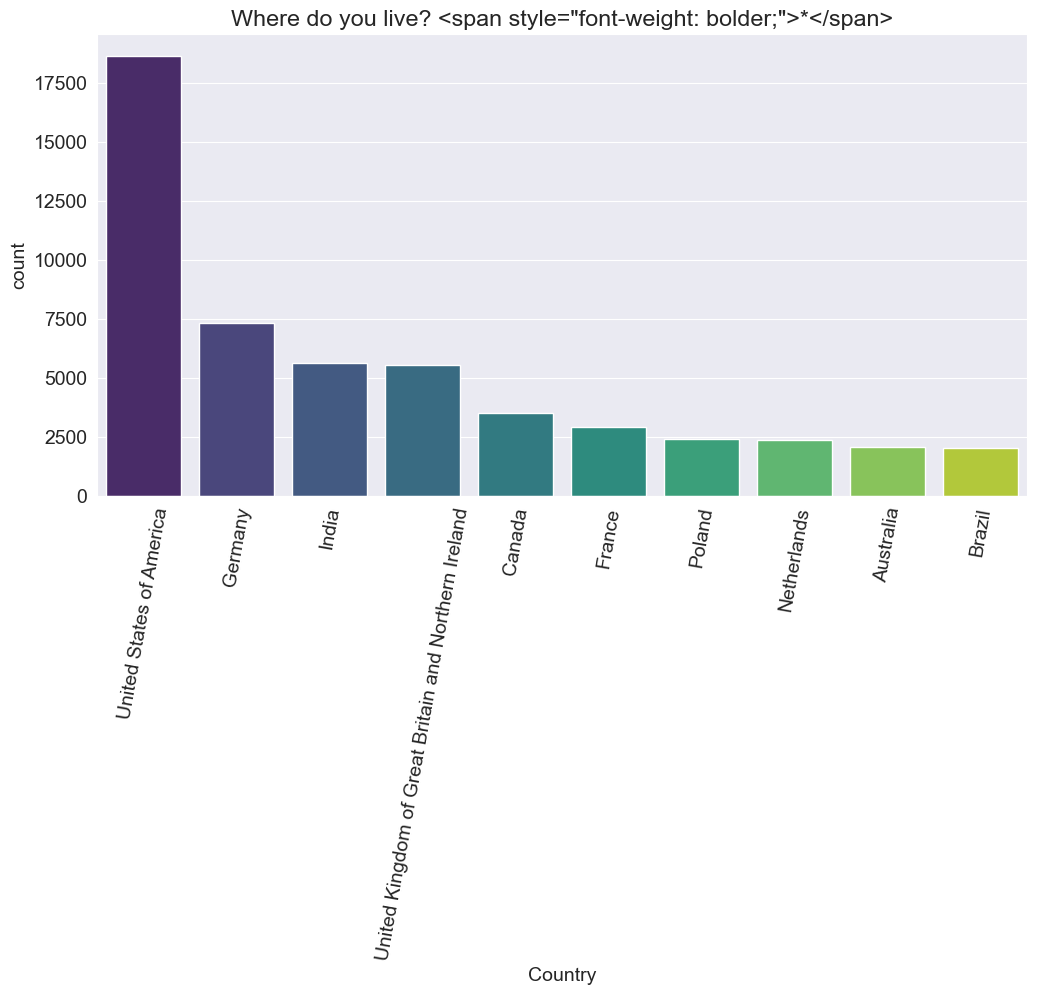

In [47]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 80)
plt.title(schema.Country)
sns.barplot(Top_Countries,palette='viridis')

(array([ 4128., 17931.,     0., 33247., 20532.,     0.,  8334.,     0.,
         3392.,  1171.]),
 array([10., 16., 22., 28., 34., 40., 46., 52., 58., 64., 70.]),
 <BarContainer object of 10 artists>)

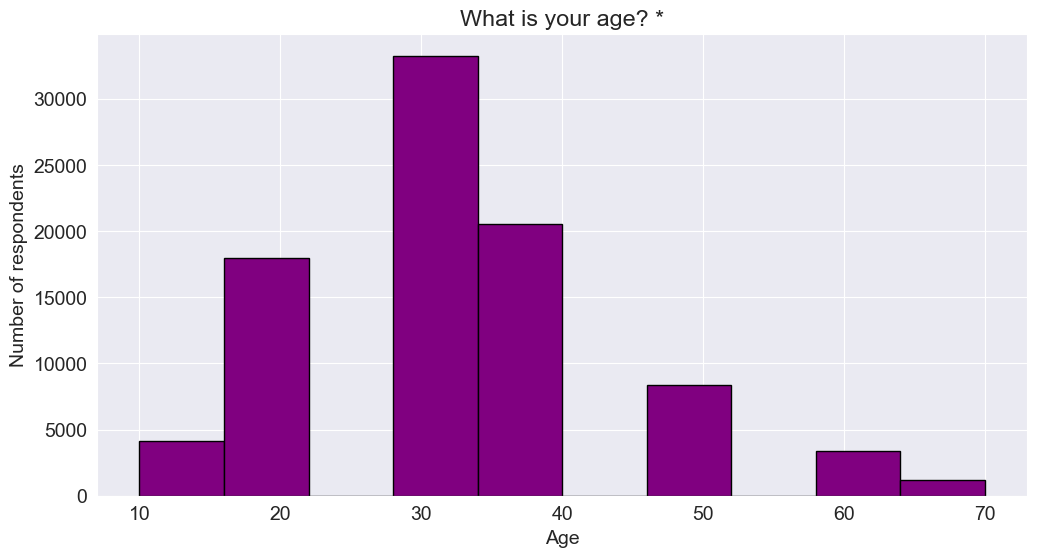

In [48]:
plt.figure(figsize=(12,6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')
plt.hist(Survey_df.Age,bins = np.arange(10,75,6),color='purple',edgecolor='black')

# Questions About Programming

C:\Users\HP\AppData\Local\Temp\ipykernel_5116\1503675502.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=Survey_df['EdLevel'], data=Survey_df, palette='viridis')


Text(0, 0.5, '')

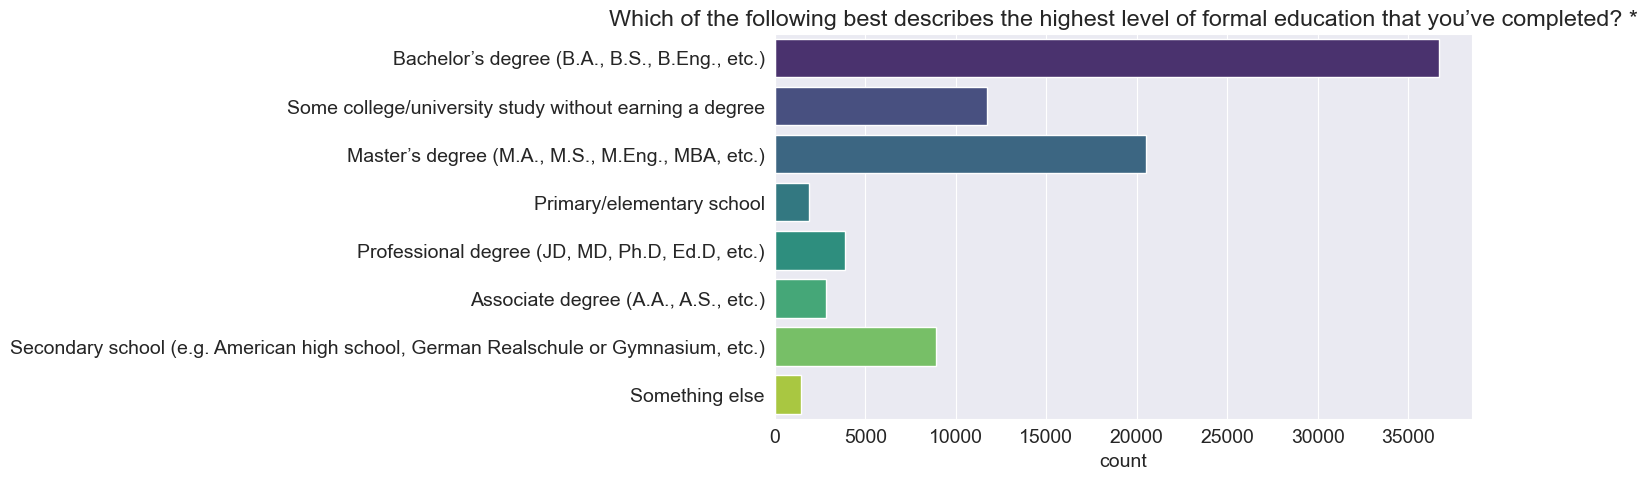

In [49]:
sns.countplot(y=Survey_df['EdLevel'], data=Survey_df, palette='viridis')
plt.title(schema['EdLevel'])
plt.ylabel(None)

C:\Users\HP\AppData\Local\Temp\ipykernel_5116\2378883226.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=learn_code_df, x='Count', y='Method', palette='viridis')


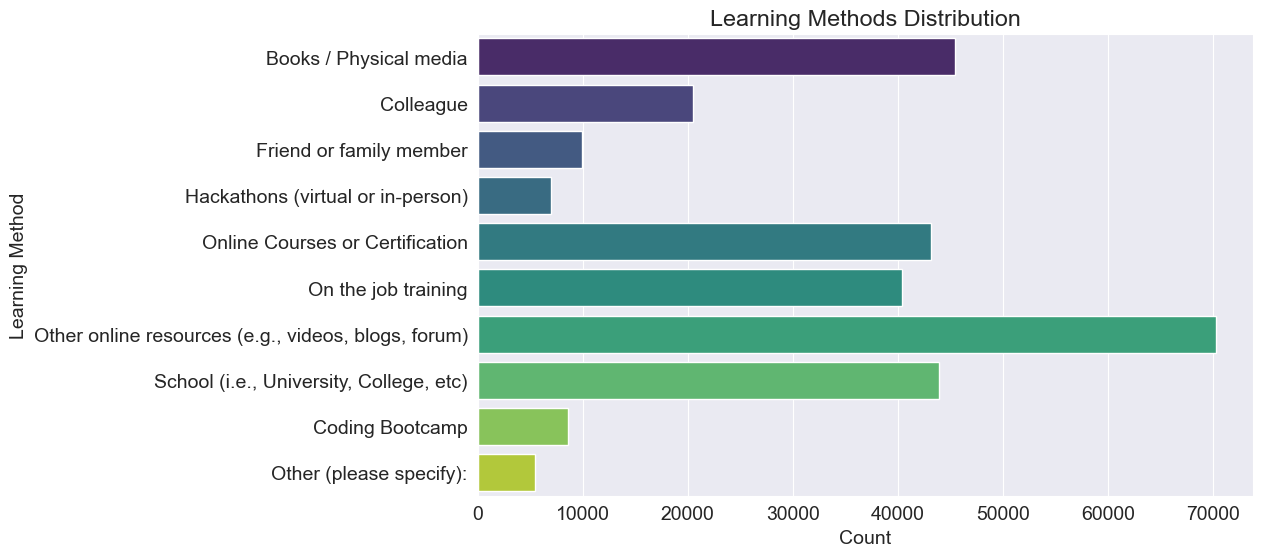

In [50]:
from collections import Counter

LearnCode = Survey_df['LearnCode'].iloc[:,1].dropna()
LearnCode = LearnCode.apply(lambda x: x.split(';')).tolist()
# LearnCode
flattened_list = [item.strip() for sublist in LearnCode for item in sublist]
learn_code_counts = Counter(flattened_list)
learn_code_df = pd.DataFrame.from_dict(learn_code_counts, orient='index').reset_index()
learn_code_df.columns = ['Method', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=learn_code_df, x='Count', y='Method', palette='viridis')
plt.title('Learning Methods Distribution')
plt.xlabel('Count')
plt.ylabel('Learning Method')
plt.show()


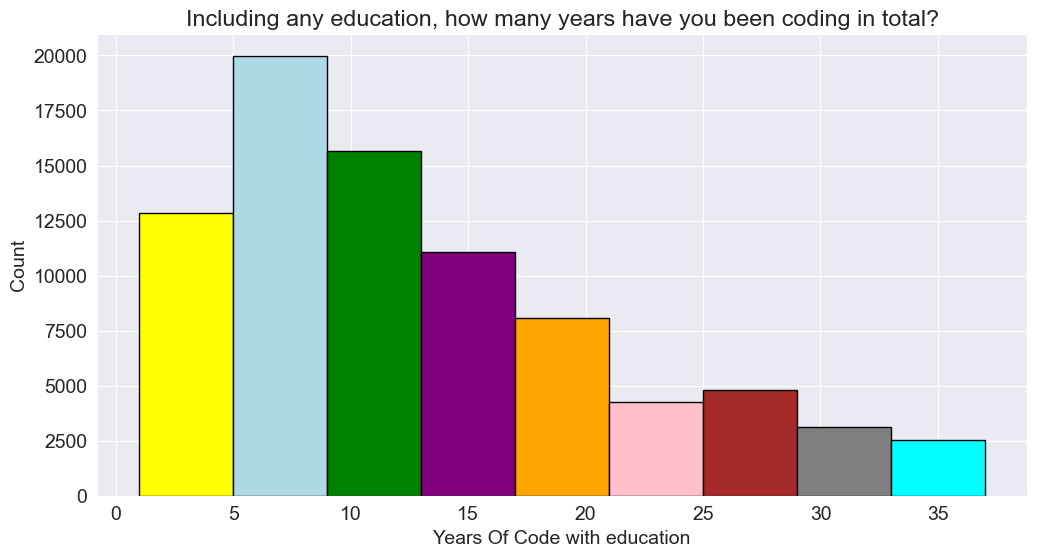

In [51]:
colors = ['yellow', 'lightblue', 'green', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan']

plt.figure(figsize=(12,6))
plt.title(schema['YearsCode'])
plt.xlabel('Years Of Code with education')
plt.ylabel('Count')
n, bins, patches = plt.hist(Survey_df['YearsCode'], bins=np.arange(1, 40, 4), edgecolor='black')
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)
plt.show()

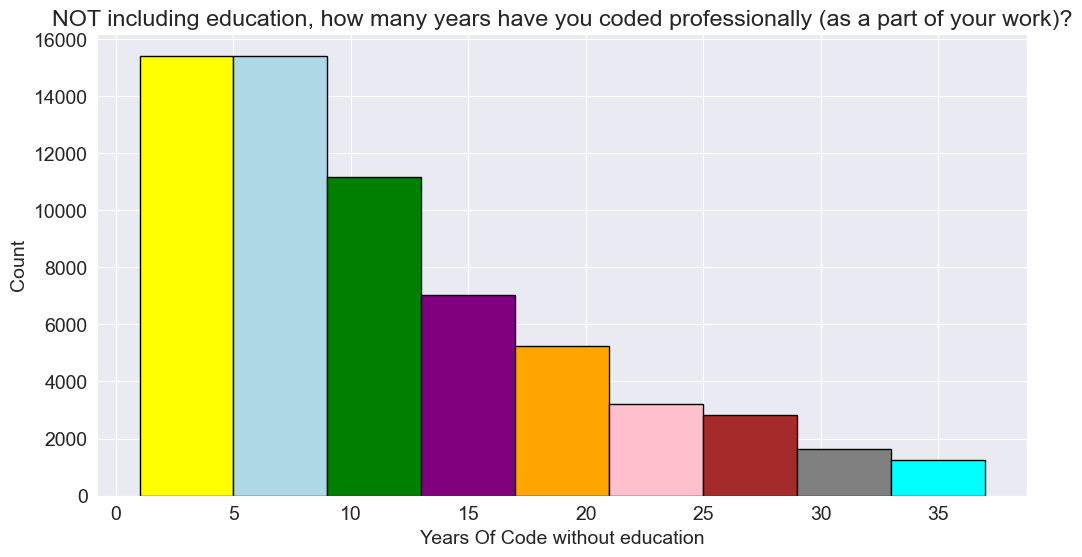

In [52]:
colors = ['yellow', 'lightblue', 'green', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan']

plt.figure(figsize=(12,6))
plt.title(schema['YearsCodePro'])
plt.xlabel('Years Of Code without education')
plt.ylabel('Count')
n, bins, patches = plt.hist(Survey_df['YearsCodePro'], bins=np.arange(1, 40, 4), edgecolor='black')
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_5116\1331553538.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Top_10_Language, x='Count', y='Language', palette='viridis')


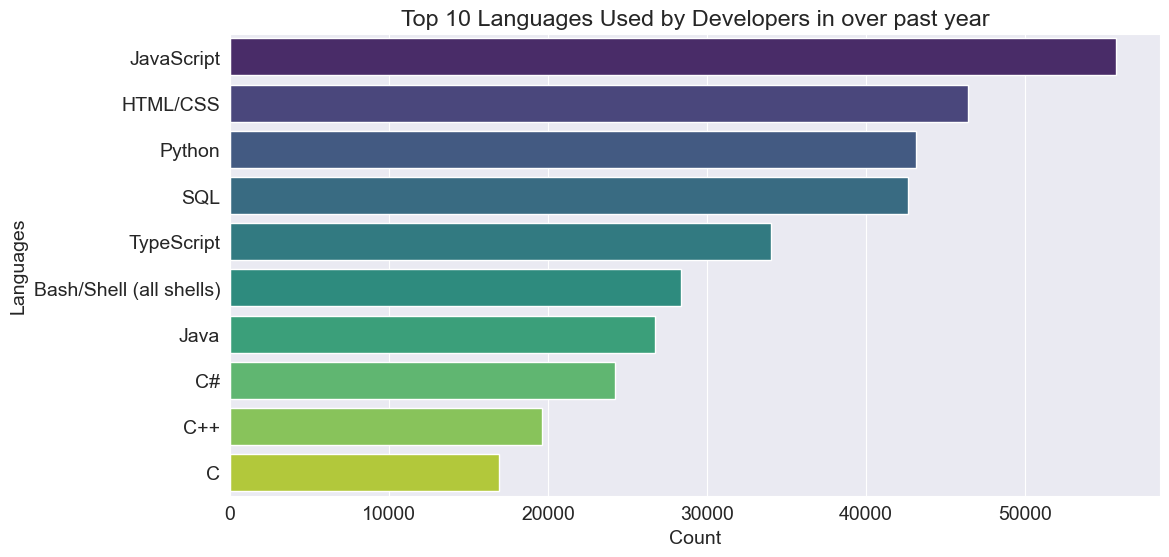

In [53]:
Language_used  = Survey_df['LanguageHaveWorkedWith'].dropna()
Language_used  = Language_used.apply(lambda x:x.split(";")).tolist()
Single_list = [item.strip() for sublist in Language_used for item in sublist]

Language_used_Count = Counter(Single_list)
Language_used_df = pd.DataFrame.from_dict(Language_used_Count,orient='index').reset_index()
Language_used_df.columns = ['Language','Count']
Top_10_Language = Language_used_df.sort_values(by='Count',ascending=False).reset_index()
Top_10_Language = Top_10_Language.drop('index',axis=1)
Top_10_Language = Top_10_Language.head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=Top_10_Language, x='Count', y='Language', palette='viridis')
plt.title("Top 10 Languages Used by Developers in over past year")
plt.xlabel('Count')
plt.ylabel('Languages')
plt.show()


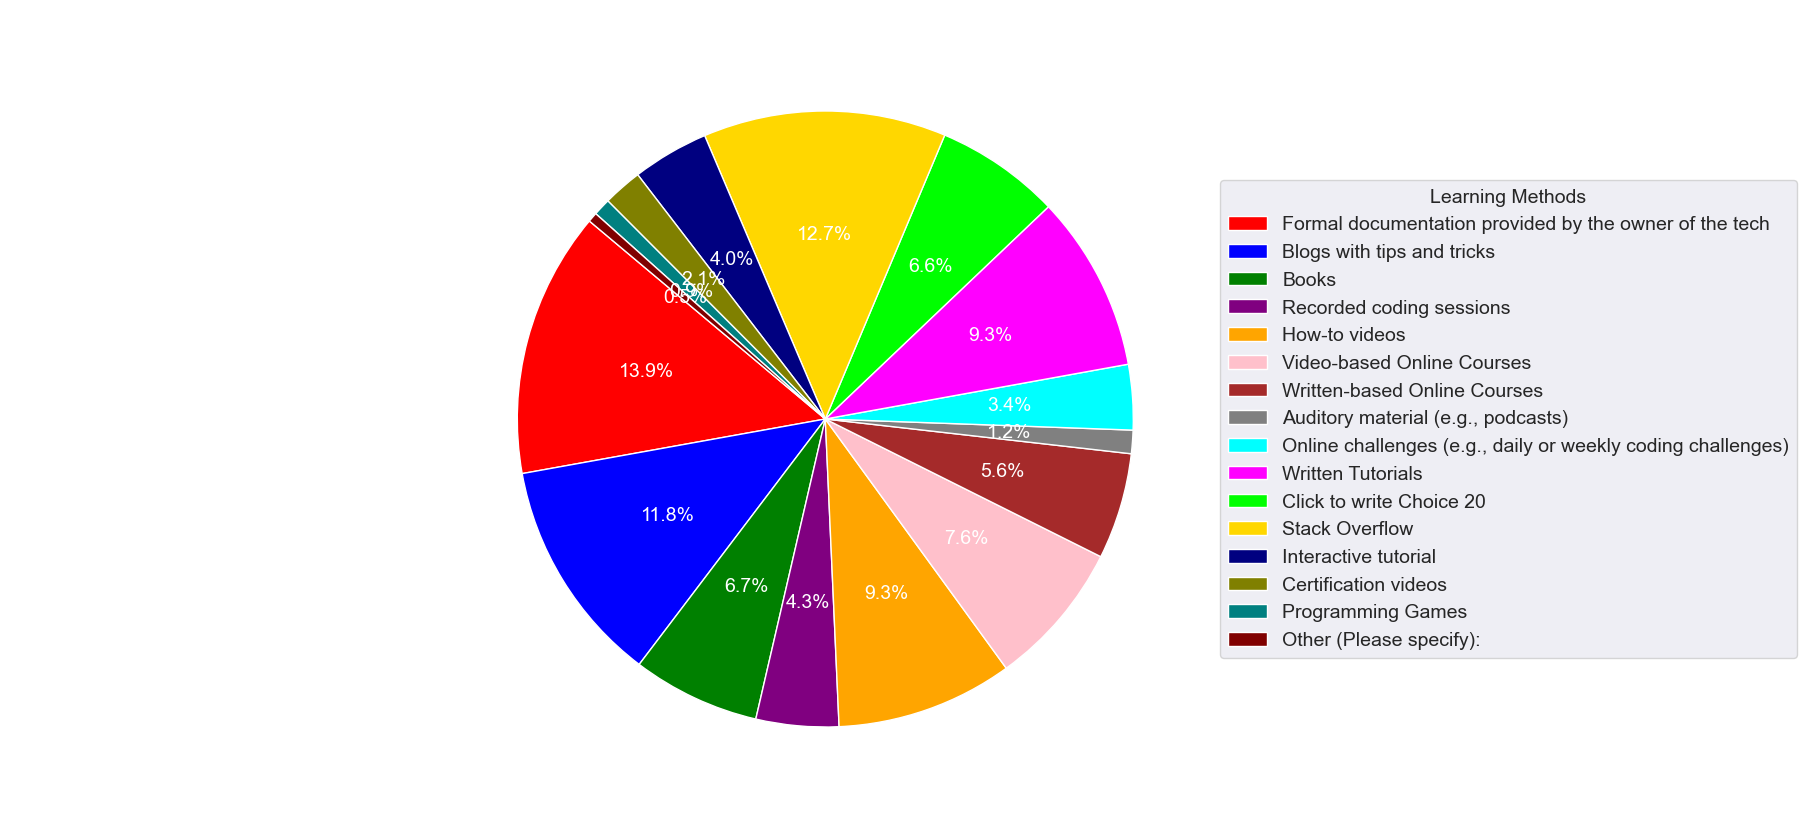

In [54]:
LearnCodeOnline = Survey_df['LearnCodeOnline'].dropna().apply(lambda x:x.split(";")).tolist()
Single_list_Online_Code_Learning = [item.strip() for sublist in LearnCodeOnline for item in sublist]

Single_list_Online_Code_Learning_counter = Counter(Single_list_Online_Code_Learning)
Online_Code_Learning_df = pd.DataFrame.from_dict(Single_list_Online_Code_Learning_counter,orient='index').reset_index()
Online_Code_Learning_df.columns = ['Method','Count']
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan', 'magenta',
         'lime', 'gold', 'navy', 'olive', 'teal', 'maroon',]
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(
    Online_Code_Learning_df['Count'], 
    labels=Online_Code_Learning_df['Method'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,
    textprops=dict(color="w")
)

ax.set_title('Distribution of Learning Methods', color='white')

ax.legend(wedges, Online_Code_Learning_df['Method'], title="Learning Methods", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

fig.patch.set_facecolor('white')
ax.patch.set_facecolor('white')

C:\Users\HP\AppData\Local\Temp\ipykernel_5116\2807598573.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Certificate_Online, x='Count', y='Method', palette='viridis')


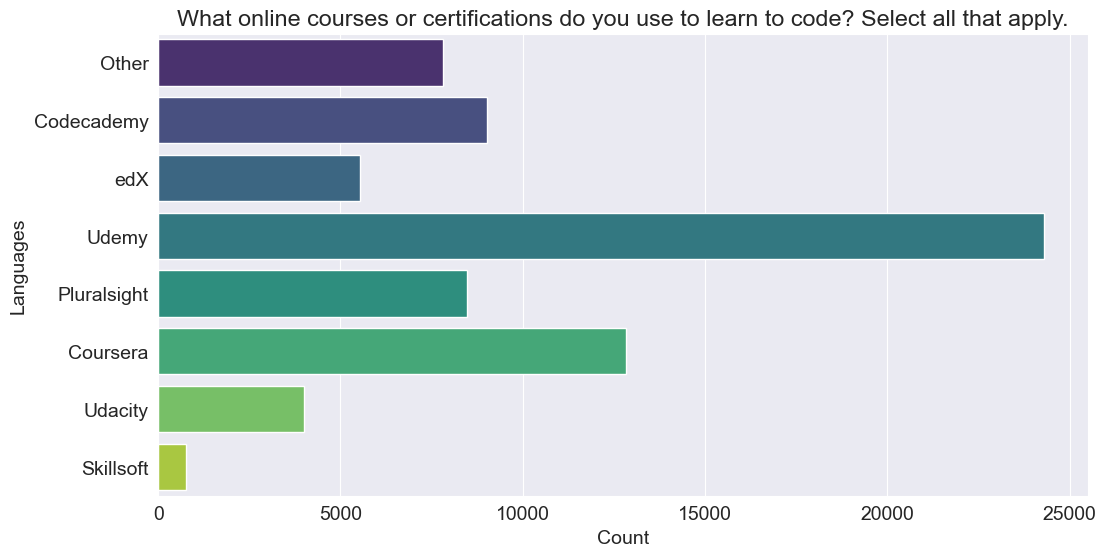

In [55]:
LearnCodeCertificate = Survey_df['LearnCodeCoursesCert'].dropna().apply(lambda x:x.split(";")).tolist()
Single_list_Certificate_Code_Learning = [item.strip() for sublist in LearnCodeCertificate for item in sublist]

Single_list_Certificate_Code_Learning_Counter = Counter(Single_list_Certificate_Code_Learning)
Single_list_Certificate_Code_Learning_Counter
Certificate_Online = pd.DataFrame.from_dict(Single_list_Certificate_Code_Learning_Counter,orient='index').reset_index()
Certificate_Online.columns = ['Method','Count']

plt.figure(figsize=(12,6))
sns.barplot(data=Certificate_Online, x='Count', y='Method', palette='viridis')
plt.title(schema['LearnCodeCoursesCert'])
plt.xlabel('Count')
plt.ylabel('Languages')
plt.show()


# Questions About Artificial Intelligence

C:\Users\HP\AppData\Local\Temp\ipykernel_5116\781484736.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Ai_Bot_Used_Df, x='Count', y='Ai Bot', palette='viridis')


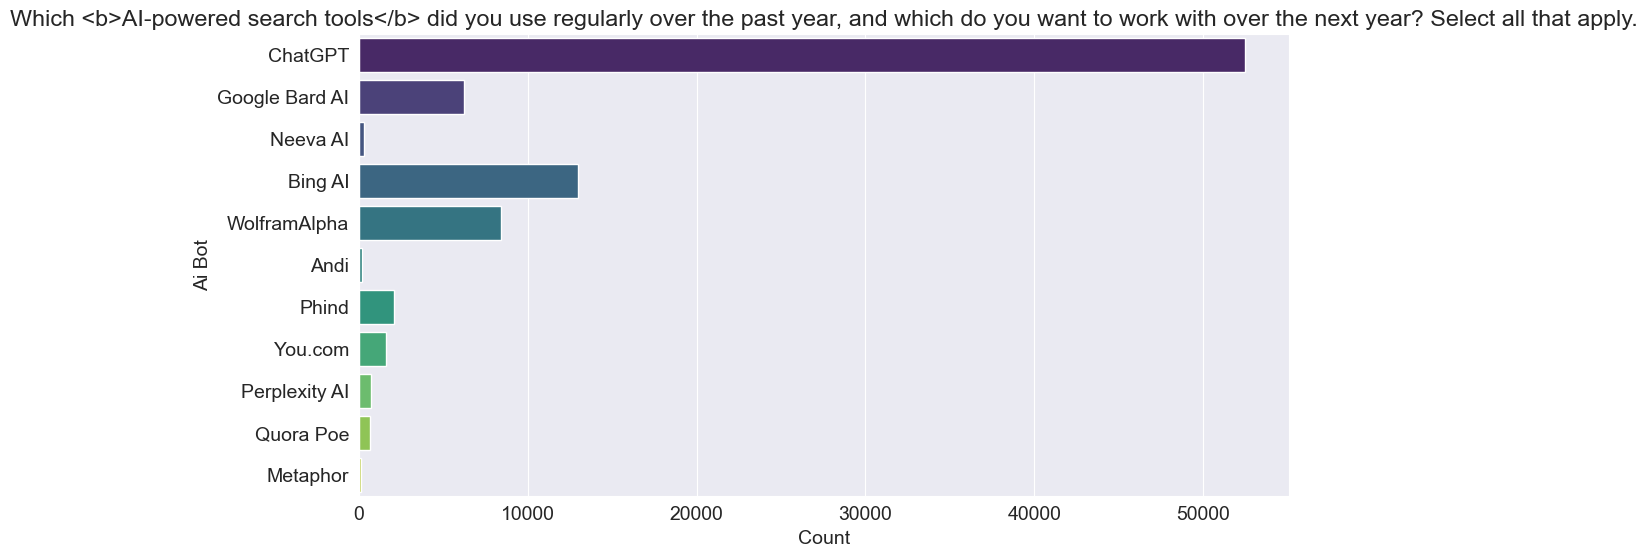

In [56]:
# Survey_df['AISearchHaveWorkedWith']
Ai_Bot_Used = Survey_df['AISearchHaveWorkedWith'].dropna().apply(lambda x:x.split(";")).tolist()
Single_List_Ai_Bot_Used = [item.strip() for sublist in Ai_Bot_Used for item in sublist]
Single_List_Ai_Bot_Used_Counter = Counter(Single_List_Ai_Bot_Used)

Ai_Bot_Used_Df = pd.DataFrame.from_dict(Single_List_Ai_Bot_Used_Counter,orient='index').reset_index()
Ai_Bot_Used_Df.columns = ["Ai Bot","Count"]

plt.figure(figsize=(12,6))
sns.barplot(data=Ai_Bot_Used_Df, x='Count', y='Ai Bot', palette='viridis')
plt.title(schema['AISearch'])
plt.xlabel('Count')
plt.ylabel('Ai Bot')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_5116\928810482.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Ai_Dev_Used_Df, x='Count', y='Ai Dev', palette='viridis')


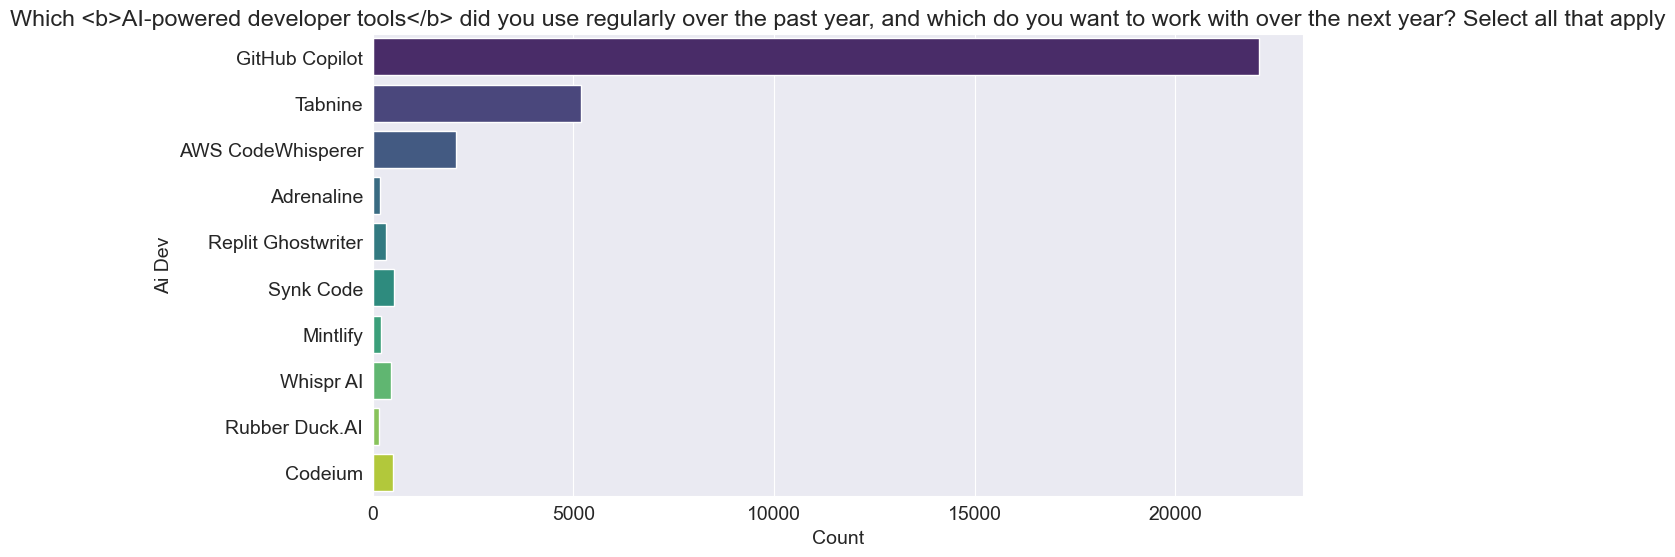

In [57]:
#     'AIDevHaveWorkedWith',
#     'SOAI',
#     'AISelect',
#     'AISent',
#     'AIToolInterested in Using',
Survey_df['AIDevHaveWorkedWith']

Ai_Dev_Used = Survey_df['AIDevHaveWorkedWith'].dropna().apply(lambda x:x.split(";")).tolist()
Single_List_Ai_Dev_Used = [item.strip() for sublist in Ai_Dev_Used for item in sublist]
Single_List_Ai_Dev_Used_Counter = Counter(Single_List_Ai_Dev_Used)

Ai_Dev_Used_Df = pd.DataFrame.from_dict(Single_List_Ai_Dev_Used_Counter,orient='index').reset_index()
Ai_Dev_Used_Df.columns = ["Ai Dev","Count"]

plt.figure(figsize=(12,6))
sns.barplot(data=Ai_Dev_Used_Df, x='Count', y='Ai Dev', palette='viridis')
plt.title(schema['AIDev'])
plt.xlabel('Count')
plt.ylabel('Ai Dev')
plt.show()

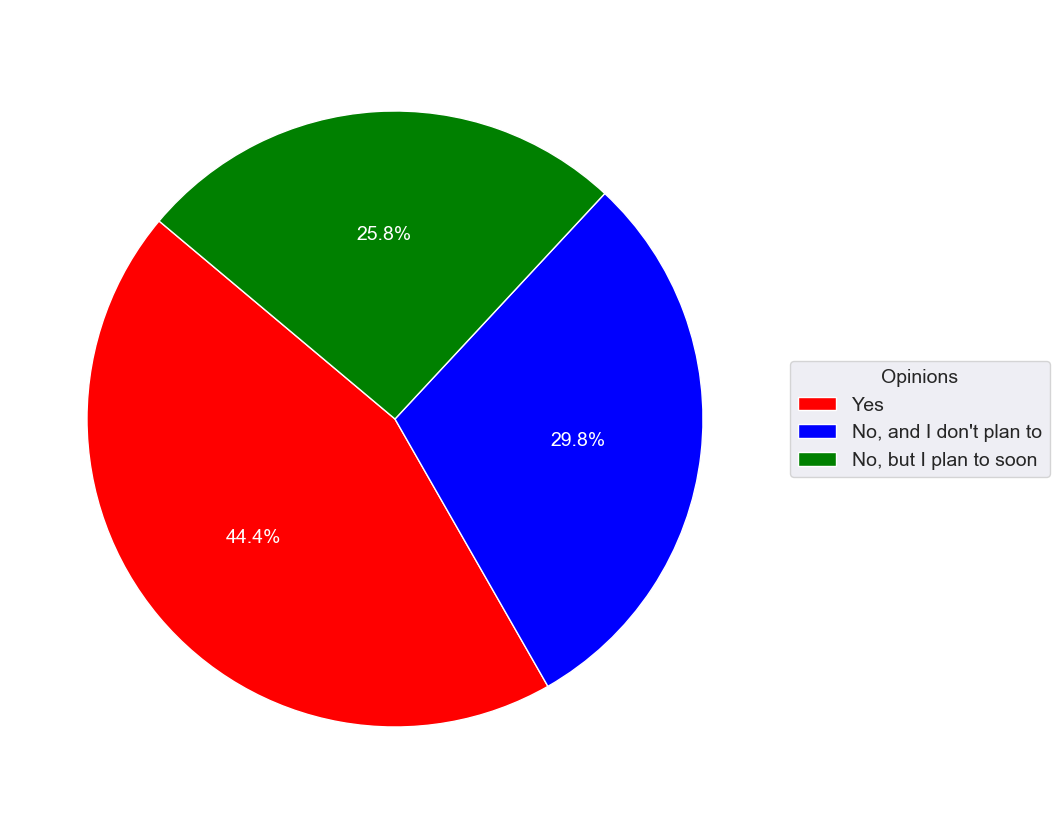

In [58]:
Ai_Select = Survey_df['AISelect'].dropna().apply(lambda x:x.split(";")).tolist()
Single_List_Ai_Select = [item.strip() for sublist in Ai_Select for item in sublist]
Single_List_Ai_Select_Counter = Counter(Single_List_Ai_Select)

Ai_Select_Used_Df = pd.DataFrame.from_dict(Single_List_Ai_Select_Counter,orient='index').reset_index()
Ai_Select_Used_Df.columns = ["Ai Select","Count"]
# Ai_Select_Used_Df

colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan', 'magenta',
         'lime', 'gold', 'navy', 'olive', 'teal', 'maroon',]
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(
    Ai_Select_Used_Df['Count'], 
    labels=Ai_Select_Used_Df['Ai Select'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,
    textprops=dict(color="w")
)


ax.set_title('Using AI in development', color='white')

ax.legend(wedges, Ai_Select_Used_Df['Ai Select'], title="Opinions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

fig.patch.set_facecolor('white')
ax.patch.set_facecolor('white')

C:\Users\HP\AppData\Local\Temp\ipykernel_5116\1758520373.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Ai_Sent_Used_Df, x='Count', y='Ai Sent', palette='viridis')


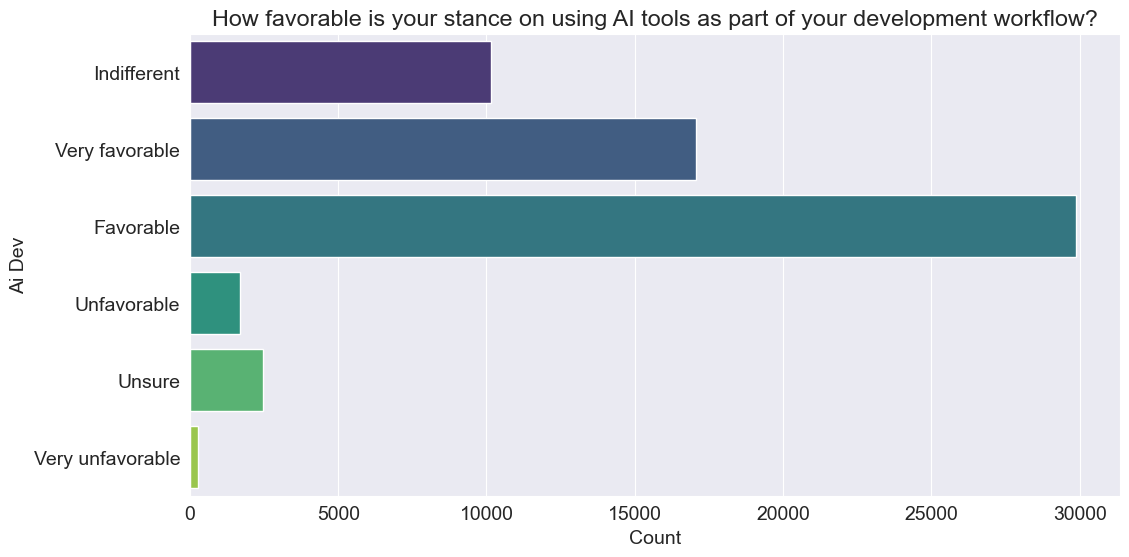

In [59]:
Ai_Sent = Survey_df['AISent'].dropna().apply(lambda x:x.split(";")).tolist()
Single_List_Ai_Sent = [item.strip() for sublist in Ai_Sent for item in sublist]
Single_List_Ai_Sent_Counter = Counter(Single_List_Ai_Sent)

Ai_Sent_Used_Df = pd.DataFrame.from_dict(Single_List_Ai_Sent_Counter,orient='index').reset_index()
Ai_Sent_Used_Df.columns = ["Ai Sent","Count"]

plt.figure(figsize=(12,6))
sns.barplot(data=Ai_Sent_Used_Df, x='Count', y='Ai Sent', palette='viridis')
plt.title(schema['AISent'])
plt.xlabel('Count')
plt.ylabel('Ai Dev')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_5116\1674573690.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Ai_Tools_df, x='Count', y='Ai Tools', palette='viridis')


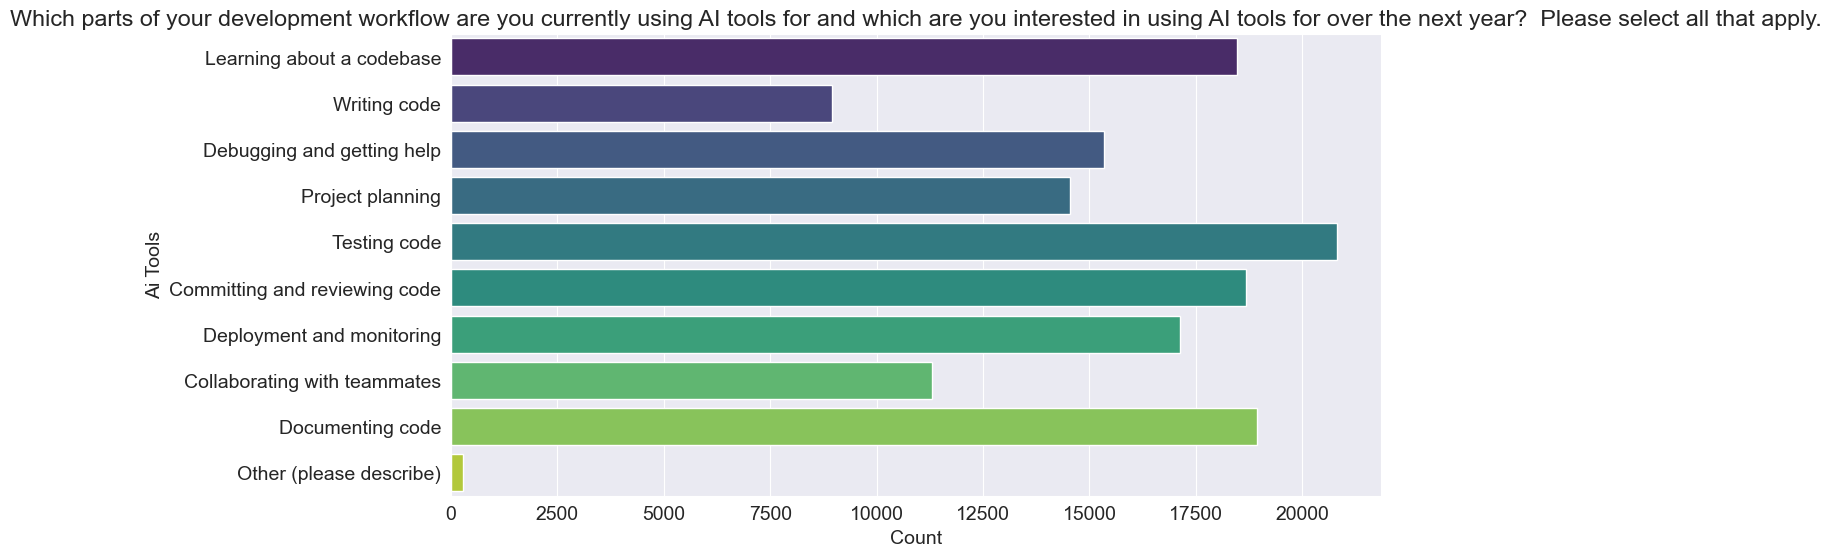

In [60]:
# Survey_df['AIToolInterested in Using']

Ai_Tools_Intrested = Survey_df['AIToolInterested in Using'].dropna().apply(lambda x:x.split(";")).tolist()
Single_List_Ai_Tools_Intrested = [item.strip() for sublist in Ai_Tools_Intrested for item in sublist]
Single_List_Ai_Tools_Intrested_Counter = Counter(Single_List_Ai_Tools_Intrested)

Ai_Tools_df = pd.DataFrame.from_dict(Single_List_Ai_Tools_Intrested_Counter,orient='index').reset_index()
Ai_Tools_df.columns = ["Ai Tools","Count"]

plt.figure(figsize=(12,6))
sns.barplot(data=Ai_Tools_df, x='Count', y='Ai Tools', palette='viridis')
plt.title(schema['AITool'])
plt.xlabel('Count')
plt.ylabel('Ai Tools')
plt.show()